<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Assignment__RandomWalks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt

def create_random_grid(rows, cols, max_barriers, num_organisms):
    grid = [['.' for _ in range(cols)] for _ in range(rows)]

    # Randomly determine the number of barriers and their positions
    num_barriers = random.randint(1, max_barriers)
    barrier_positions = random.sample(range(rows * cols), num_barriers)
    for position in barrier_positions:
        row = position // cols
        col = position % cols
        grid[row][col] = '#'

    # Place organisms randomly on the grid
    organism_positions = random.sample(range(rows * cols), num_organisms)
    for position in organism_positions:
        row = position // cols
        col = position % cols
        grid[row][col] = 'o'

    return grid, organism_positions

def get_neighbors(x, y, rows, cols):
    neighbors = []
    if x > 0:
        neighbors.append((x - 1, y))
    if x < rows - 1:
        neighbors.append((x + 1, y))
    if y > 0:
        neighbors.append((x, y - 1))
    if y < cols - 1:
        neighbors.append((x, y + 1))
    return neighbors
def random_walks_with_absorbing_barriers(grid, num_steps, num_organisms):
    rows = len(grid)
    cols = len(grid[0])

    organisms = [(x, y) for x in range(rows) for y in range(cols) if grid[x][y] == 'o']

    for step in range(num_steps):
        new_organisms = []

        if not organisms:
            break

        for x, y in organisms:
            if grid[x][y] == '#':
                grid[x][y] = '.'  # Organism is absorbed into the barrier
            else:
                neighbors = get_neighbors(x, y, rows, cols)
                valid_neighbors = [(x, y) for x, y in neighbors if grid[x][y] == '.']

                if valid_neighbors:
                    next_x, next_y = random.choice(valid_neighbors)
                    grid[x][y] = '.'  # Move organism from current cell
                    grid[next_x][next_y] = 'o'  # Place organism in new cell
                    new_organisms.append((next_x, next_y))
                else:
                    new_organisms.append((x, y))  # Stay in the same cell

        organisms = new_organisms
        organisms = [(x, y) for x, y in organisms if grid[x][y] != '.']  # Remove absorbed organisms
        if len(organisms) > num_organisms:
            break
        if not organisms:
          break

    return grid, len(organisms)


def plot_grid(grid):
    rows = len(grid)
    cols = len(grid[0])

    plt.figure(figsize=(cols, rows))
    plt.imshow([[0 if cell == '.' else 1 for cell in row] for row in grid], cmap='gray')

    plt.title("Random Walk with Absorbing Barriers")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.gca().invert_yaxis()  # Invert y-axis to match grid indexing
    plt.grid()
    plt.show()

if __name__ == "__main__":
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))
    max_barriers = int(input("Enter the maximum number of barriers: "))
    num_organisms = int(input("Enter the number of organisms: "))
    num_steps = int(input("Enter the number of steps: "))

    initial_grid, initial_organisms = create_random_grid(rows, cols, max_barriers, num_organisms)

    print("Initial grid:")
    for row in initial_grid:
        print(''.join(row))

    final_grid, final_organisms = random_walks_with_absorbing_barriers(initial_grid, num_steps, initial_organisms)

    print("\nFinal grid:")
    for row in final_grid:
        print(''.join(row))

    print("\nNumber of organisms before random walk:", initial_organisms)
    print("Number of organisms after random walk:", final_organisms)

    plot_grid(final_grid)

Enter the number of rows: 10
Enter the number of columns: 20
Enter the maximum number of barriers: 100
Enter the number of organisms: 20
Enter the number of steps: 40
Initial grid:
..###........#...#..
##.o...o##.#..#....o
.#.#..#o.....#..##o#
...#....o#o..#....#.
o...##...#......##o.
...##..#.o.o.#.#.o#o
##....o..##.....#..#
.#.#....o....#.o##..
...###....##..#..#..
....#.o.o.#..#.oo..#


TypeError: ignored

Enter the number of rows: 10
Enter the number of columns: 20
Enter the maximum number of barriers: 60
Enter the number of organisms: 20
Enter the number of steps: 40
Initial grid:
.....o..o...........
.......o..oo....#...
..............##....
....o......o.o......
..o.........o...o...
o.................#.
...........o..o.....
.o.....o...o#..o....
.o.........o#.......
....................

Final grid:
......o....o........
......o.oo......#...
.............o##....
...o........o.......
oo.........o...o....
..................#.
............oo......
.oo...o...o.#.......
............#..o....
...........o........

Number of organisms before random walk: [27, 30, 64, 73, 8, 134, 147, 141, 151, 155, 71, 31, 131, 5, 161, 92, 96, 171, 100, 82]
Number of organisms after random walk: 20


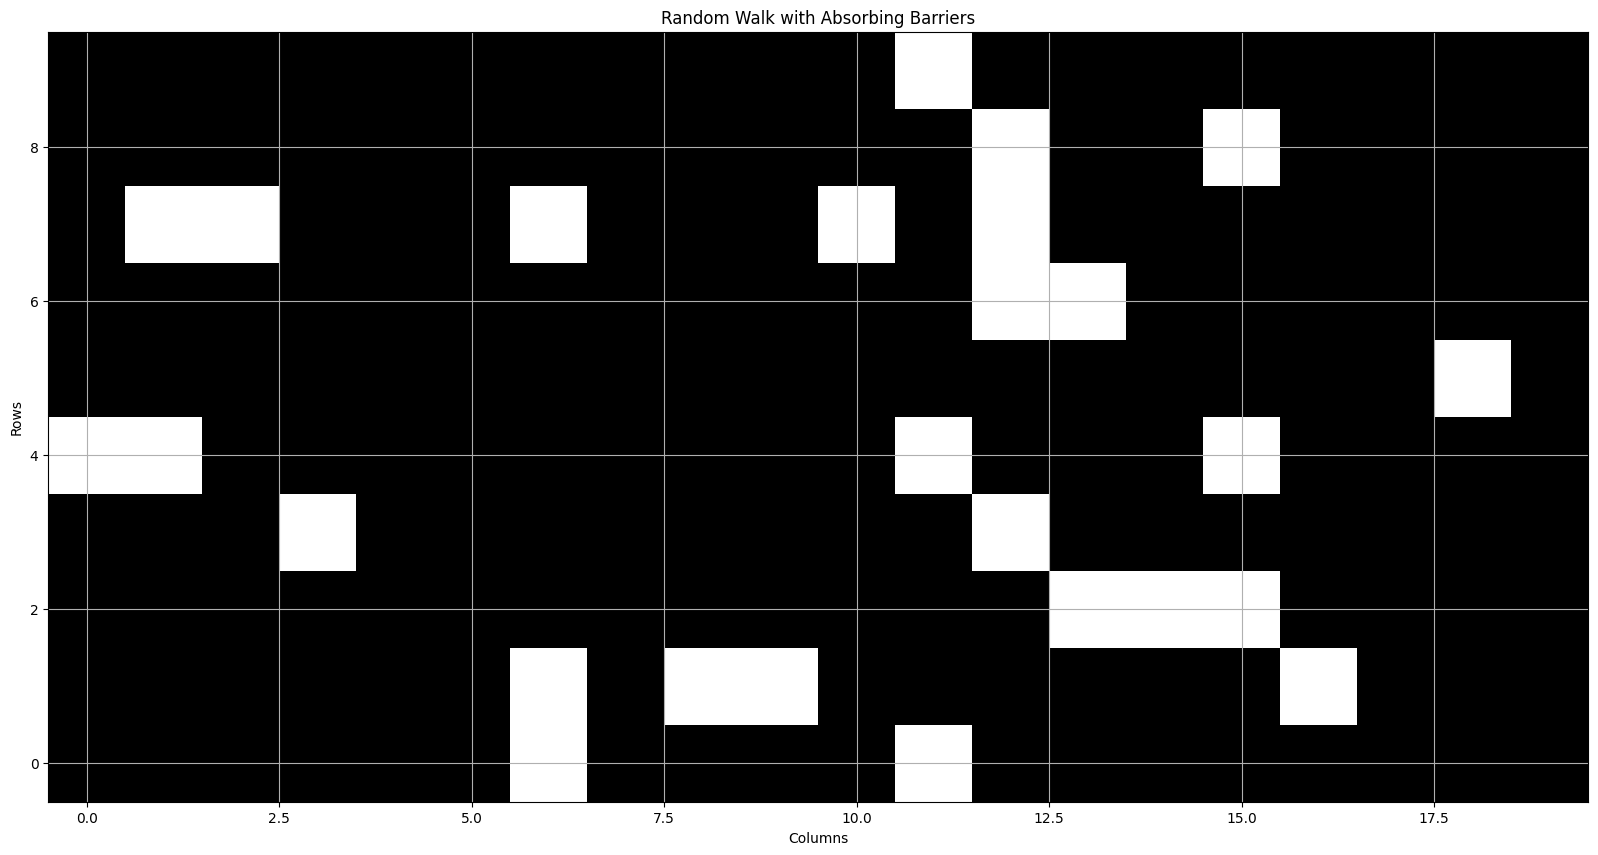

In [ ]:
import random
import matplotlib.pyplot as plt

def create_random_grid(rows, cols, max_barriers, num_organisms):
    grid = [['.' for _ in range(cols)] for _ in range(rows)]

    # Randomly determine the number of barriers and their positions
    num_barriers = random.randint(1, max_barriers)
    barrier_positions = random.sample(range(rows * cols), num_barriers)
    for position in barrier_positions:
        row = position // cols
        col = position % cols
        grid[row][col] = '#'

    # Place organisms randomly on the grid
    organism_positions = random.sample(range(rows * cols), num_organisms)
    for position in organism_positions:
        row = position // cols
        col = position % cols
        grid[row][col] = 'o'

    return grid, organism_positions

def get_neighbors(x, y, rows, cols):
    neighbors = []
    if x > 0:
        neighbors.append((x - 1, y))
    if x < rows - 1:
        neighbors.append((x + 1, y))
    if y > 0:
        neighbors.append((x, y - 1))
    if y < cols - 1:
        neighbors.append((x, y + 1))
    return neighbors

def random_walks_with_absorbing_barriers(grid, num_steps, max_organisms):
    rows = len(grid)
    cols = len(grid[0])

    organisms = [(x, y) for x in range(rows) for y in range(cols) if grid[x][y] == 'o']

    for step in range(num_steps):
        new_organisms = []

        if not organisms:
            break

        for x, y in organisms:
          if grid[x][y] == '#':
            organisms.remove((x, y))  # Remove the absorbed organism from the list
          else:
            neighbors = get_neighbors(x, y, rows, cols)
            valid_neighbors = [(x, y) for x, y in neighbors if grid[x][y] == '.']

          if valid_neighbors:
            next_x, next_y = random.choice(valid_neighbors)
            grid[x][y] = '.'  # Move organism from current cell
            grid[next_x][next_y] = 'o'  # Place organism in new cell
            new_organisms.append((next_x, next_y))
          else:
            new_organisms.append((x, y))
        organisms = new_organisms
        if len(organisms) <= max_organisms:
            break

    return grid, len(organisms)

def plot_grid(grid):
    rows = len(grid)
    cols = len(grid[0])

    plt.figure(figsize=(cols, rows))
    plt.imshow([[0 if cell == '.' else 1 for cell in row] for row in grid], cmap='gray')

    plt.title("Random Walk with Absorbing Barriers")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.gca().invert_yaxis()  # Invert y-axis to match grid indexing
    plt.grid()
    plt.show()

if __name__ == "__main__":
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))
    max_barriers = int(input("Enter the maximum number of barriers: "))
    num_organisms = int(input("Enter the number of organisms: "))
    num_steps = int(input("Enter the number of steps: "))

    initial_grid, initial_organisms = create_random_grid(rows, cols, max_barriers, num_organisms)

    print("Initial grid:")
    for row in initial_grid:
        print(''.join(row))

    final_grid, final_organisms = random_walks_with_absorbing_barriers(initial_grid, num_steps, num_organisms)

    print("\nFinal grid:")
    for row in final_grid:
        print(''.join(row))

    print("\nNumber of organisms before random walk:", initial_organisms)
    print("Number of organisms after random walk:", final_organisms)

    plot_grid(final_grid)
